<a href="https://colab.research.google.com/github/AyazMurtazin/PythonLibsPractice/blob/main/TasksSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Задачи**


1. Выберите набор данных с платформ **Kaggle** или **Huggingface**. Укажите название или ссылку на выбранный датасет в отдельном листе документа вместе с перечнем библиотек, которые вы планируете использовать для анализа.  


Если вам нужен набор данных, содержащий временной ряд, вот пример подходящего датасета:

### Набор данных:
**Название:** Daily Climate Time Series Data  
**Платформа:** Kaggle  
**Ссылка:** [Daily Climate Time Series Data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)

### Описание:
Этот датасет содержит ежедневные данные о климате, включая температуру, влажность, скорость ветра и давление. Данные охватывают временной период и могут быть использованы для анализа временных рядов.

### Библиотеки для анализа:
1. **Pandas** — для работы с временными рядами и их обработки.
2. **NumPy** — для численных операций.
3. **Matplotlib** — для визуализации временных рядов.
4. **Seaborn** — для более сложной визуализации.
5. **Statsmodels** — для анализа временных рядов (например, декомпозиция, автокорреляция).
6. **Scikit-learn** — для предобработки данных и построения моделей машинного обучения.
7. **Prophet** (от Facebook) — для прогнозирования временных рядов.
8. **TensorFlow/PyTorch** — для экспериментов с нейронными сетями (например, LSTM для временных рядов).
9. **XGBoost/LightGBM** — для использования градиентного бустинга в задачах прогнозирования.

Этот набор данных и библиотеки позволят вам провести глубокий анализ временных рядов и построить модели для прогнозирования.

2. Выполните предобработку данных, используя библиотеки Python, такие как **Polars**, **PySpark**, **Pandas**, **NumPy**, **Matplotlib**, и другие. Обратите внимание, что для повышения производительности рекомендуется отдавать предпочтение библиотеке **Polars** вместо **Pandas**.  



3. Следуйте алгоритмам обработки, описанным в разделе ниже, для подготовки данных. Убедитесь, что обработка охватывает этапы:  



## **1. Импорт и первичная обработка данных**



### **1.1. Загрузка данных**


1. Загрузка данных из различных источников: файлов (CSV, Excel), баз данных или API.

In [3]:
!pip install kaggle

In [5]:
import os
os.environ['KAGGLE_USERNAME'] = "uname" # username from the json file
os.environ['KAGGLE_KEY'] = "kaggle_key" # key from the json file

In [6]:
import kaggle

# Authenticate using your Kaggle API credentials
kaggle.api.authenticate()

# Download the dataset
dataset_name = 'sumanthvrao/daily-climate-time-series-data'
download_path = './daily_climate_data'  # Path where you want to save the dataset

kaggle.api.dataset_download_files(dataset_name, path=download_path, unzip=True)

print(f"Dataset downloaded and extracted to {download_path}")

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
Dataset downloaded and extracted to ./daily_climate_data


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./daily_climate_data/DailyDelhiClimateTrain.csv')

# Check the data
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000



2. Приведение структуры данных:
   - Проверка корректности формата временных меток.
   - Приведение временных меток к типу `datetime` и сортировка данных по времени (для временных рядов).





### **1.2. Первичный осмотр данных**


1. Получение базовой информации о данных:
   - Размерность набора данных и типы столбцов (метод `info()` или его аналог в Polars).
   - Статистическое описание числовых признаков (метод `describe()` или аналог).


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [10]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


2. Выявление пропусков и выбросов:
   - Подсчет пропущенных значений.
   - Построение гистограмм и боксплотов для анализа распределения.





In [11]:
# Подсчет пропущенных значений
missing_values = data.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

Пропущенные значения:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


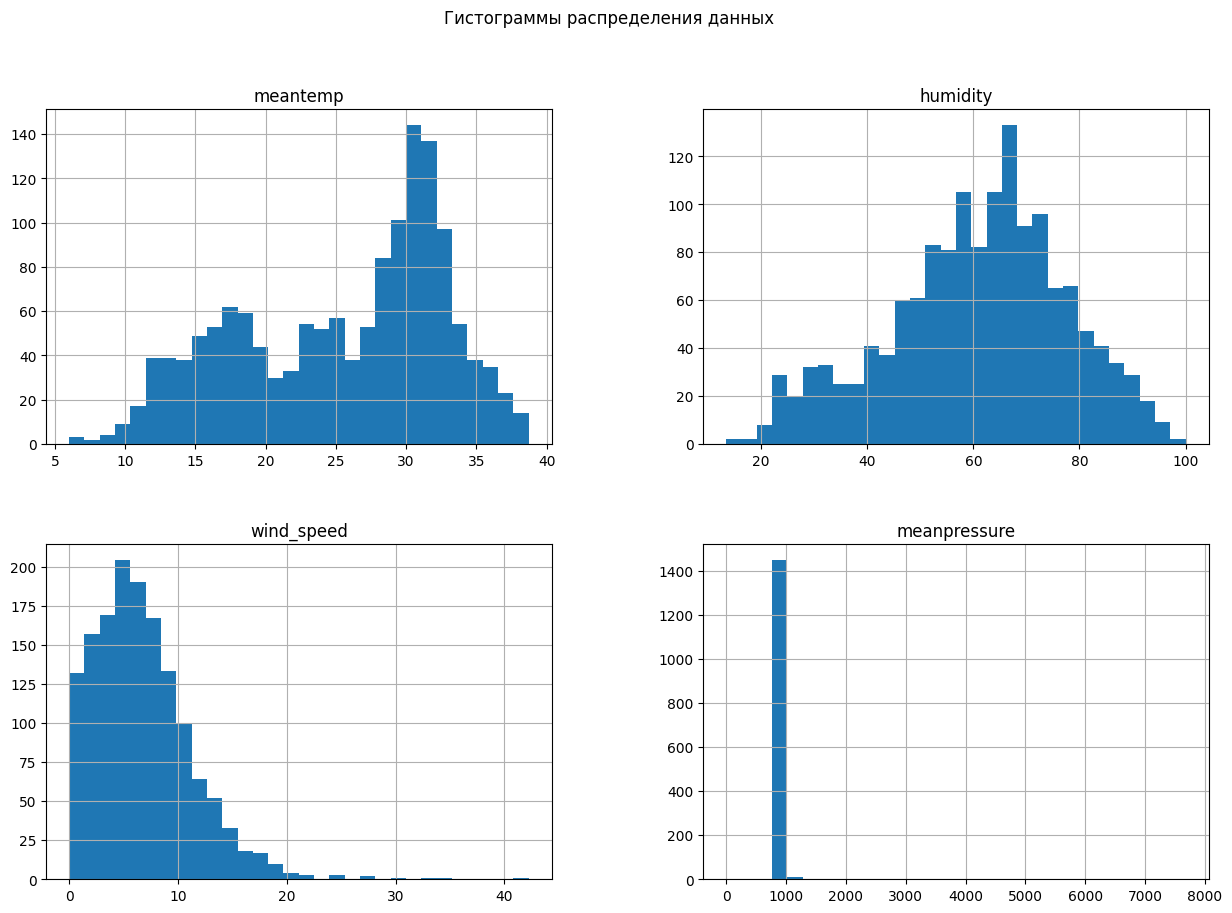

In [12]:
import matplotlib.pyplot as plt

# Гистограммы для числовых столбцов
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Гистограммы распределения данных')
plt.show()

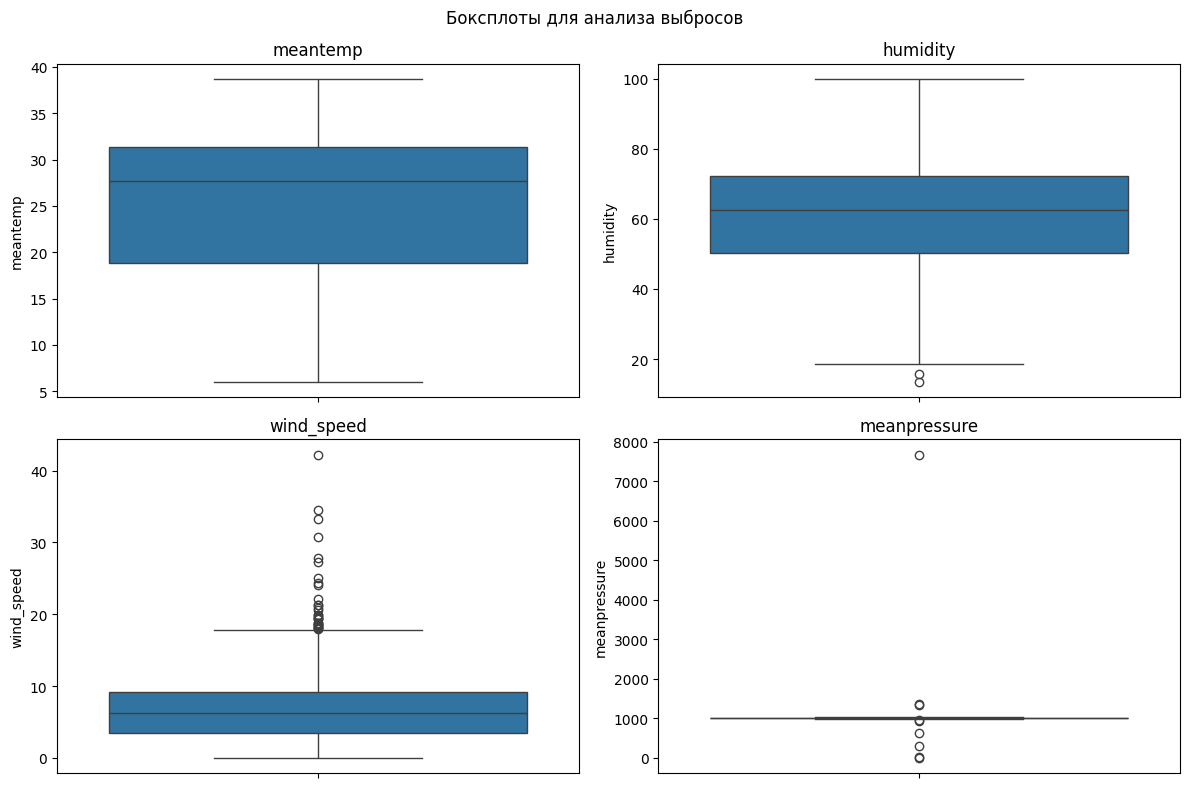

In [13]:
import seaborn as sns

# Боксплоты для числовых столбцов
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.suptitle('Боксплоты для анализа выбросов')
plt.tight_layout()
plt.show()

## **2. Обработка пропущенных данных**



### **2.1. Анализ пропусков**


1. Подсчет доли пропущенных значений в каждом столбце.


In [14]:
# Подсчет пропущенных значений
missing_values = data.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

Пропущенные значения:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


2. Определение причин пропусков (случайные, системные ошибки, временные зависимости).



In [ ]:
# пропусков нет

### **2.2. Методы обработки**


1. **Для категориальных данных**:
   - Замена на моду или добавление уровня "Unknown".


In [ ]:
# пропусков нет

2. **Для числовых данных**:
   - Замена на медиану, среднее или интерполяция.
   - Удаление строк/столбцов, если доля пропусков превышает 30%.





In [ ]:
# пропусков нет

## **3. Обработка выбросов**



### **3.1. Выявление выбросов**

1. **Метод IQR**:
   - Вычисление границ выбросов:  
     $Q1 - 1.5 \times IQR$ и $Q3 + 1.5 \times IQR$.


In [17]:
# Вычисление IQR для столбца 'meantemp'
Q1 = data['meantemp'].quantile(0.25)
Q3 = data['meantemp'].quantile(0.75)
IQR = Q3 - Q1

# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявление выбросов
outliers = data[(data['meantemp'] < lower_bound) | (data['meantemp'] > upper_bound)]
print("Выбросы по методу IQR:")
print(outliers)

Выбросы по методу IQR:
Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


2. **Метод трех сигм**:
   - Границы: $\mu - 3\sigma$ и $\mu + 3\sigma$.


In [18]:
# Вычисление среднего и стандартного отклонения
mean = data['meantemp'].mean()
std = data['meantemp'].std()

# Границы для выбросов
lower_bound_sigma = mean - 3 * std
upper_bound_sigma = mean + 3 * std

# Выявление выбросов
outliers_sigma = data[(data['meantemp'] < lower_bound_sigma) | (data['meantemp'] > upper_bound_sigma)]
print("Выбросы по методу трех сигм:")
print(outliers_sigma)

Выбросы по методу трех сигм:
Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


3. Использование методов машинного обучения (например, Isolation Forest).



In [19]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Подготовка данных
X = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]

# Обучение модели Isolation Forest
model = IsolationForest(contamination=0.05)  # contamination - доля выбросов
model.fit(X)

# Предсказание выбросов
data['anomaly'] = model.predict(X)

# Выбросы (аномалии)
outliers_iso = data[data['anomaly'] == -1]
print("Выбросы по методу Isolation Forest:")
print(outliers_iso)

Выбросы по методу Isolation Forest:
            date   meantemp    humidity  wind_speed  meanpressure  anomaly
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667       -1
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000       -1
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667       -1
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000       -1
5     2013-01-06   7.000000   82.800000    1.480000   1018.000000       -1
...          ...        ...         ...         ...           ...      ...
1425  2016-11-26  24.294118   32.647059   14.494118   1013.250000       -1
1427  2016-11-28  22.454545   37.318182    9.185714     12.045455       -1
1450  2016-12-21  18.050000   54.300000   19.404762   1015.619048       -1
1454  2016-12-25  14.000000   94.300000    9.085000   1014.350000       -1
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000       -1

[74 rows x 6 columns]


### **3.2. Обработка выбросов**


1. Замена выбросов на медиану или ближайшее допустимое значение.


2. Удаление выбросов, если их доля мала (< 5%).

In [20]:
# Вычисление доли выбросов
outliers = data[(data['meantemp'] < lower_bound) | (data['meantemp'] > upper_bound)]
outlier_ratio = len(outliers) / len(data)
print(f"Доля выбросов: {outlier_ratio:.2%}")

# Удаление выбросов, если их доля мала
if outlier_ratio < 0.05:  # Меньше 5%
    data_cleaned = data[(data['meantemp'] >= lower_bound) & (data['meantemp'] <= upper_bound)]
else:
    print("Доля выбросов слишком велика для удаления.")

# Проверка результата
print("Данные после удаления выбросов:")
print(data_cleaned['meantemp'].describe())

Доля выбросов: 0.00%
Данные после удаления выбросов:
count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64


## **4. Проверка стационарности и трендов**



### **4.1. Гипотезы**
- $H₀$: Временной ряд стационарен.  
- $H₁$: Временной ряд нестационарен.

### **4.2. Методы проверки**


1. **ADF (Augmented Dickey-Fuller):**  
   $p\text{-value} < 0.05$ — стационарность подтверждается.


In [21]:
from statsmodels.tsa.stattools import adfuller

# Пример данных (столбец 'meantemp')
result = adfuller(data['meantemp'])

# Вывод результатов
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Интерпретация
if result[1] < 0.05:
    print("Ряд стационарен (отвергаем H₀)")
else:
    print("Ряд нестационарен (не можем отвергнуть H₀)")

ADF Statistic: -2.0210690559206737
p-value: 0.2774121372301601
Critical Values:
   1%: -3.4348647527922824
   5%: -2.863533960720434
   10%: -2.567831568508802
Ряд нестационарен (не можем отвергнуть H₀)


2. **KPSS:**  
   $p\text{-value} < 0.05$ — ряд нестационарен.



In [22]:
from statsmodels.tsa.stattools import kpss

# Пример данных (столбец 'meantemp')
result = kpss(data['meantemp'])

# Вывод результатов
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(f'   {key}: {value}')

# Интерпретация
if result[1] < 0.05:
    print("Ряд нестационарен (отвергаем H₀)")
else:
    print("Ряд стационарен (не можем отвергнуть H₀)")


KPSS Statistic: 0.18786352260533618
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Ряд стационарен (не можем отвергнуть H₀)


<ipython-input-22-51f8c6ceb979>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data['meantemp'])


### **4.3. Обработка нестационарности**


1. Дифференцирование: удаление тренда с помощью разности первого порядка.


In [23]:
data['meantemp_diff'] = data['meantemp'].diff().dropna()ё

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1462 non-null   object 
 1   meantemp       1462 non-null   float64
 2   humidity       1462 non-null   float64
 3   wind_speed     1462 non-null   float64
 4   meanpressure   1462 non-null   float64
 5   anomaly        1462 non-null   int64  
 6   meantemp_diff  1461 non-null   float64
 7   meantemp_log   1462 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 91.5+ KB


2. Декомпозиция на тренд, сезонность и шум.





In [24]:
import numpy as np
data['meantemp_log'] = np.log(data['meantemp'])

## **5. Анализ взаимосвязей и мультиколлинеарности**



### **5.1. Мультиколлинеарность**


1. Вычисление **VIF** (Variance Inflation Factor):
   - Признаки с $VIF > 5$ требуют исключения или трансформации.


2. Применение PCA для уменьшения размерности.



### **5.2. Корреляционный анализ**


1. Построение корреляционной матрицы.


2. Визуализация матрицы (например, с использованием heatmap).





## **6. Преобразование данных**



### **6.1. Преобразование числовых данных**


1. Нормализация (Min-Max Scaling) для методов, чувствительных к масштабу.



2. Стандартизация (Standard Scaling) для методов, требующих нормального распределения.



### **6.2. Обработка категорий**


1. Кодирование категориальных признаков:
   - One-Hot Encoding — для независимых категорий.
   - Label Encoding — для упорядоченных категорий.


2. Группировка редких категорий в общий уровень ("Other").





## **7. Проверка распределений**



### **7.1. Нормальность**


1. Тесты (Шапиро-Уилк или Колмогоров-Смирнов):  
   $p\text{-value} < 0.05$ указывает на отклонение от нормального распределения.


2. Q-Q графики для визуального анализа.



### **7.2. Трансформация признаков**


1. Логарифмическое преобразование.


2. Преобразование Бокса-Кокса.





## **8. Проверка гипотез**



### **8.1. Значимость признаков**


1. **t-тест** — для сравнения двух групп.


2. **ANOVA** — для анализа различий между несколькими группами.



### **8.2. Анализ дисперсий**


1. Тест Левене:
   $p\text{-value} < 0.05$ — различия дисперсий значимы.





## **9. Time Series Cross-Validation**


1. Учет временной последовательности:
   - Разделение данных с использованием метода скользящего окна.


2. Оценка устойчивости модели на временных подвыборках.





## **10. Генерация новых признаков**



### **10.1. Инженерия признаков**


1. Лаговые признаки (lag features).


2. Сезонные признаки (месяц, день недели).


3. Агрегация (например, средние значения за неделю).



### **10.2. Удаление избыточных признаков**


1. Использование методов отбора признаков (Lasso, RFE).
